# Support Vector Machines

- Lineer olarak ayrılamayan veri setlerinde



### Mapping data into a higher dimensional space is called kernelling
- Kernel ->Uzayın boyutunu artırarak plain alanla dataları ayırmak mümkün
- Normalde liner olarak ayrılamıyor içi içe geçmiş olduğu için uzay boyutu artırılarak ayrılıyor

Kernel functions:
- Hangisinin iyi olduğuna karar vermek mümkün değil ancak karşılaştırma yaparak karar verebiliriz
- Linear
- Polynomial
- Sigmoid
- Radial basis function (RBF)
### How to create the plain
- Our purpose is discraminate the data into classes best possible way


- SVM memory efficent 
- Sadece margine bakıp hyperplane çiziyor
- Amaç en büyük margini yakalamak. Yaklaladığımızda en optimum hyoerplane'i çizmiş oluyoruz

Adventages:
- memory efficent : uses a subset of training points in the decision function (subset: support vectors)
- accurate in high dimensional space

Disadventeges:
- Prone to over-fitting(if the number of feautures is much greater than the number of samples)
- small datasets (<1000 rows)
- no probability estimation 

Destek vektör makineleri (SVM), sadece karar fonksiyonunda kullanılan eğitim verilerinin bir alt kümesine odaklanır. Bu alt küme, destek vektörler olarak adlandırılır. Bu yaklaşım, bellek kullanımını etkili bir şekilde yönetir ve büyük veri setleriyle çalışma avantajı sağlar. 

- Image Recognition
- Text category assigment
- Bionformatic data 
- Spam detection

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score


In [29]:
cell_df = pd.read_csv('cell_samples.csv')

In [30]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


- The ID field contains the patient identifiers.
- The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.
- The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

## Data pre-processing and selection

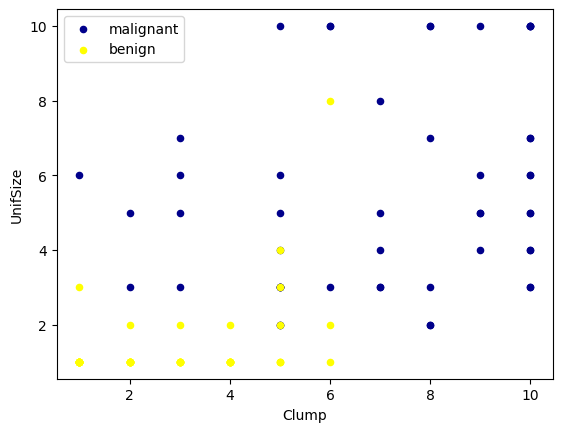

In [47]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

# Semicolon in Python: https://programiz.pro/resources/python-semicolons/

In [31]:
cell_df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
471,1238777,6,1,1,3,2,1,1,1,1,2
501,1238186,4,1,1,1,2,1,2,1,1,2
313,693702,1,1,1,1,2,1,1,1,1,2
423,1257815,5,1,3,1,2,1,2,1,1,2
35,1079304,2,1,1,1,2,1,2,1,1,2


In [32]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [33]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

In [34]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [35]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

In [36]:
X[0:10]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1,  5],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1]], dtype=int64)

In [37]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])

In [38]:
y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

## Train/test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

In [40]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


## Modeling
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [41]:
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [42]:
y_pred = model.predict(X_test)
y_pred[0:10]

array([4, 4, 4, 4, 4, 4, 2, 2, 4, 4])

## Evaluation

In [43]:
cnf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98        89
           4       0.94      0.98      0.96        48

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



Confusion matrix, without normalization
[[86  3]
 [ 1 47]]
Normalized confusion matrix
[[0.96629213 0.03370787]
 [0.02083333 0.97916667]]


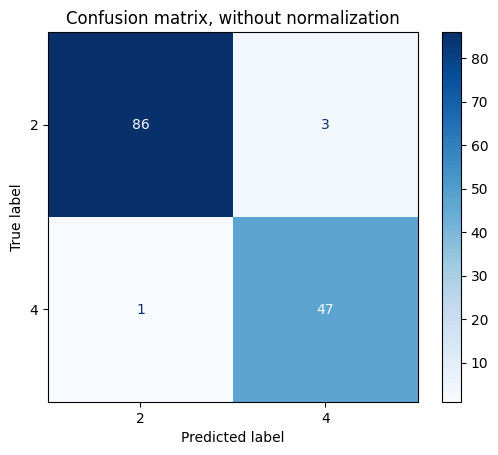

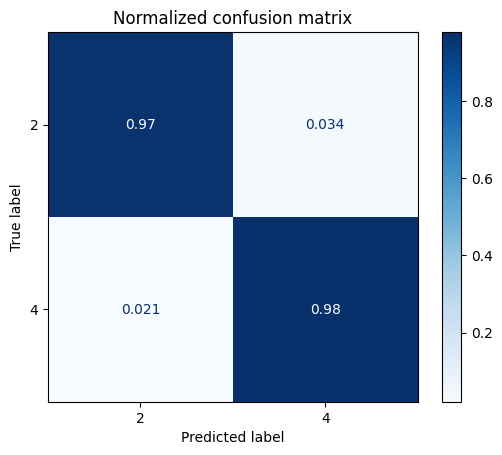

In [44]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=[2,4],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [45]:
f1_score(y_test, y_pred, average='weighted') 

0.9709349565971047

In [46]:
jaccard_score(y_test, y_pred, pos_label=2)

0.9555555555555556